In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

from sklearn.linear_model import Ridge
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from yellowbrick.regressor import ResidualsPlot
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
from scipy.stats import normaltest

plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('ggplot')


In [22]:
houses_df = pd.read_csv('train.csv', encoding='latin1')

houses_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


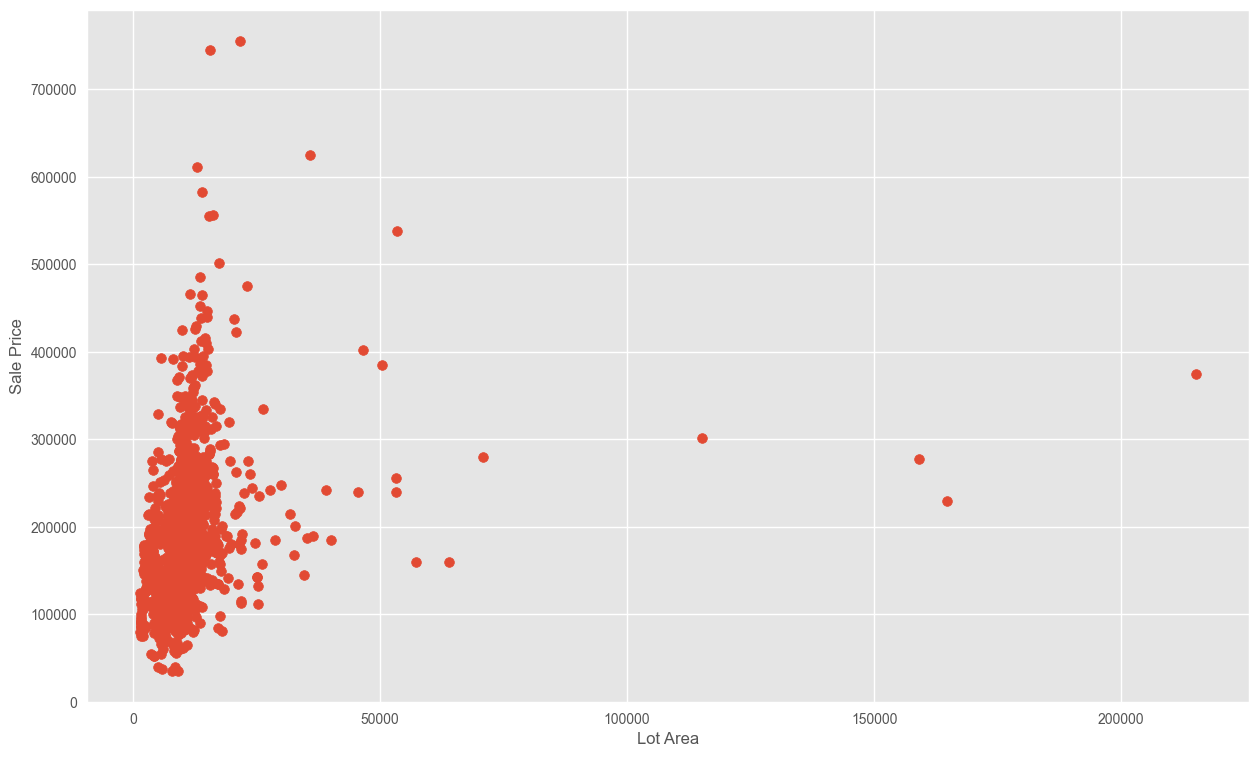

In [25]:
#exploratory data analysis
houses_df.describe()



plt.scatter(houses_df['LotArea'], houses_df['SalePrice'])
plt.xlabel('Lot Area (ft^2)')
plt.ylabel('Sale Price ($)')
plt.show()



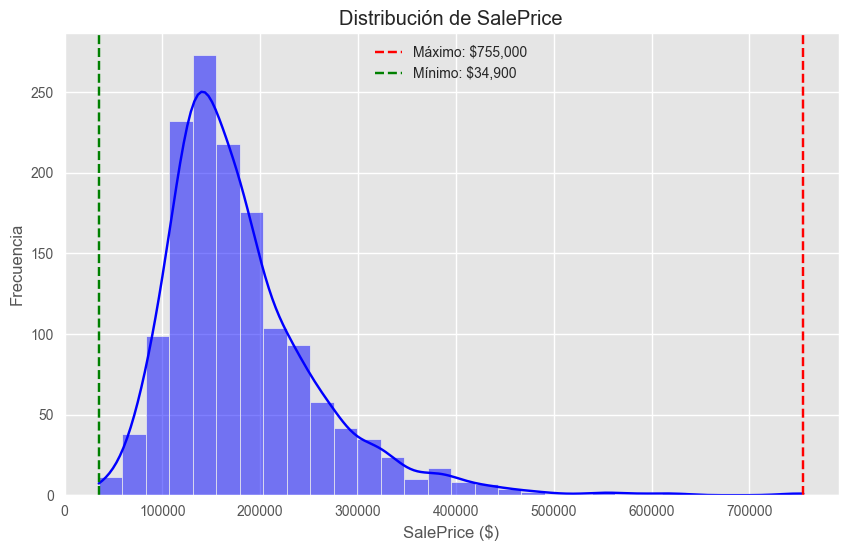

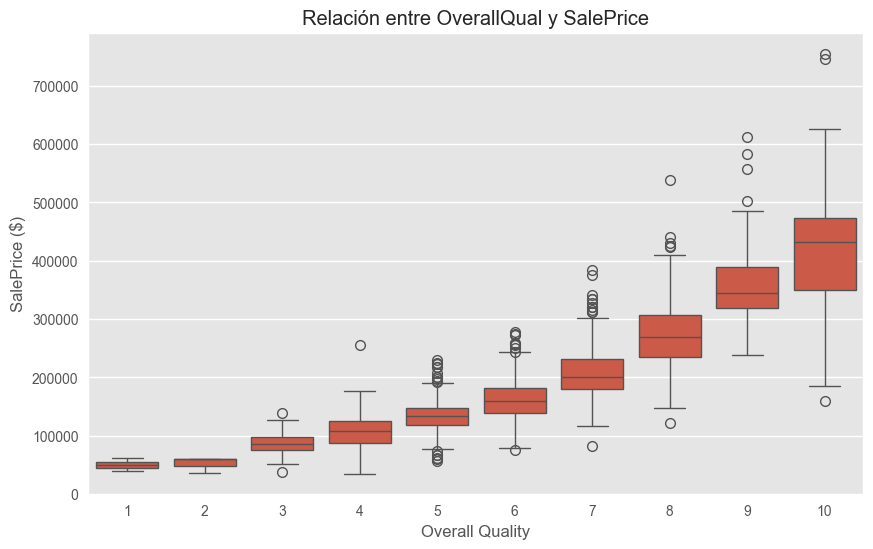

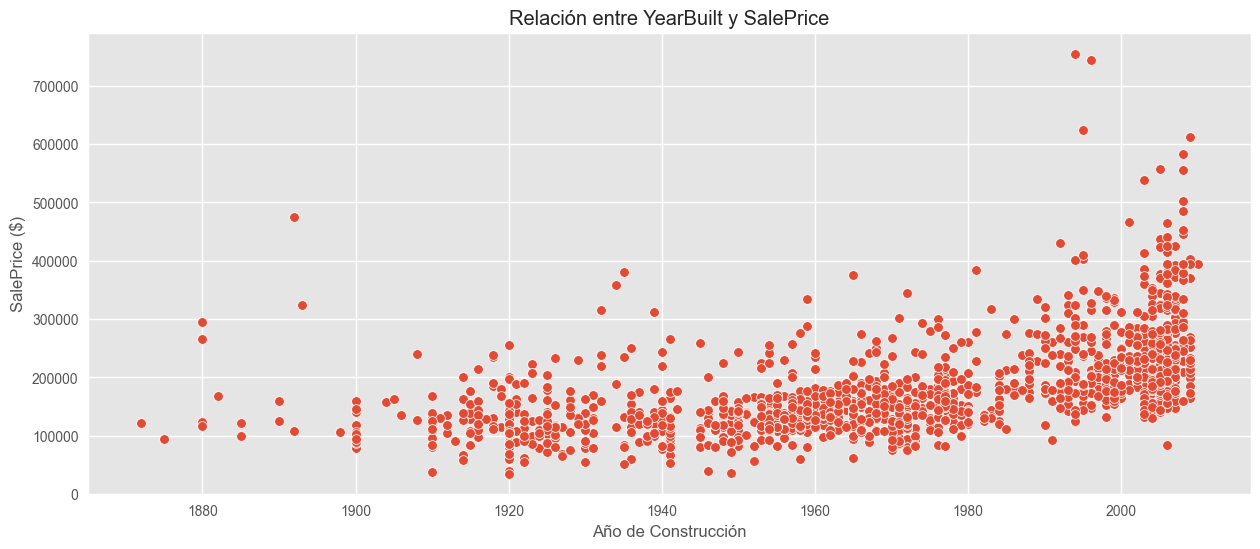

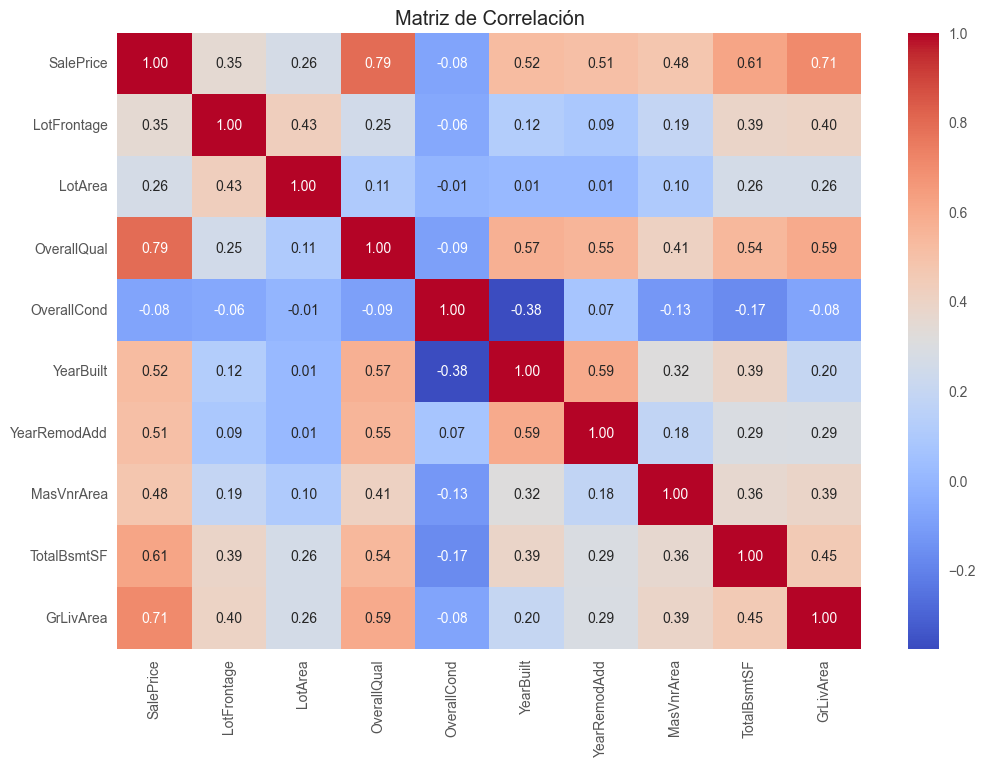

In [8]:
# Calcular el máximo y mínimo de SalePrice
max_sale_price = selected_df['SalePrice'].max()
min_sale_price = selected_df['SalePrice'].min()

# Graficar la distribución de la variable 'SalePrice' con líneas para el máximo y el mínimo
plt.figure(figsize=(10,6))
sns.histplot(selected_df['SalePrice'], kde=True, bins=30, color='blue')
plt.axvline(x=max_sale_price, color='red', linestyle='--', label=f'Máximo: ${max_sale_price:,}')
plt.axvline(x=min_sale_price, color='green', linestyle='--', label=f'Mínimo: ${min_sale_price:,}')
plt.title('Distribución de SalePrice')
plt.xlabel('SalePrice ($)')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


# Graficar la relación entre 'OverallQual' y 'SalePrice'
plt.figure(figsize=(10,6))
sns.boxplot(x='OverallQual', y='SalePrice', data=selected_df)
plt.title('Relación entre OverallQual y SalePrice')
plt.xlabel('Overall Quality')
plt.ylabel('SalePrice ($)')
plt.show()

# Graficar la relación entre 'YearBuilt' y 'SalePrice'
plt.figure(figsize=(15,6))
sns.scatterplot(x='YearBuilt', y='SalePrice', data=selected_df)
plt.title('Relación entre YearBuilt y SalePrice')
plt.xlabel('Año de Construcción')
plt.ylabel('SalePrice ($)')
plt.show()

# Graficar la matriz de correlación entre todas las variables
correlation_matrix = selected_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
